# 09. Milestone Project 2: SkimLit 📄🔥

In the previous notebook ([NLP fundamentals in TensorFlow](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb)), we went through some fundamental natural lanuage processing concepts. The main ones being **tokenzation** (turning words into numbers) and **creating embeddings** (creating a numerical representation of words).

In this project, we're going to be putting what we've learned into practice.

More specificially, we're going to be replicating the deep learning model behind the 2017 paper [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071).

When it was released, the paper presented a new dataset called PubMed 200k RCT which consists of ~200,000 labelled Randomized Controlled Trial (RCT) abstracts.

The goal of the dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.

In other words, given the abstract of a RCT, what role does each sentence serve in the abstract?

![Skimlit example inputs and outputs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)

*Example inputs ([harder to read abstract from PubMed](https://pubmed.ncbi.nlm.nih.gov/28942748/)) and outputs ([easier to read abstract](https://pubmed.ncbi.nlm.nih.gov/32537182/)) of the model we're going to build. The model will take an abstract wall of text and predict the section label each sentence should have.*  

### Model Input

For example, can we train an NLP model which takes the following input (note: the following sample has had all numerical symbols replaced with "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model output

And returns the following output:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### Problem in a sentence

The number of RCT papers released is continuing to increase, those without structured abstracts can be hard to read and in turn slow down researchers moving through the literature. 

### Solution in a sentence

Create an NLP model to classify abstract sentences into the role they play (e.g. objective, methods, results, etc)  to enable researchers to skim through the literature (hence SkimLit 🤓🔥) and dive deeper when necessary.

> 📖 **Resources:** Before going through the code in this notebook, you might want to get a background of what we're going to be doing. To do so, spend an hour (or two) going through the following papers and then return to this notebook:
1. Where our data is coming from: [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
2. Where our model is coming from: [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

## What we're going to cover

Time to take what we've learned in the NLP fundmentals notebook and build our biggest NLP model yet:

* Downloading a text dataset ([PubMed RCT200k from GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Writing a preprocessing function to prepare our data for modelling
* Setting up a series of modelling experiments
  * Making a baseline (TF-IDF classifier)
  * Deep models with different combinations of: token embeddings, character embeddings, pretrained embeddings, positional embeddings
* Building our first multimodal model (taking multiple types of data inputs)
  * Replicating the model architecture from https://arxiv.org/pdf/1612.05251.pdf 
* Find the most wrong predictions
* Making predictions on PubMed abstracts from the wild

## How you should approach this notebook

You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.

> 📖 **Resource:** See the full set of course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning

### Confirm access to a GPU

In [ ]:
# confirm access to GPU
!nvidia-smi

Sat Sep  3 18:33:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get data

Since we'll be replicating the paper above (pubMed 200k RCT), lets download the dataset they used.
we can do so from the authors Github: https://github.com/Franck-Dernoncourt/pubmed-rct

In [ ]:
# let clone the github page
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
# Check what files are in the PubMed 20k dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/
!ls pubmed-rct/PubMed_20k_RCT

#Dev is for validation set

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.txt


In [ ]:
# Start our experiment using the 20k dataset with numbers replace by @ sign
data_dir= "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames= [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Preprocess data

Now we've got some text data, it's time to become one with the data.

> Visualize, Visualize, Visualized

So with this in mind, let write a funtion to read in all of the lines of a target text file

In [ ]:
# Create funtion to read the lines of a documents
def get_lines(filename):
  """
  Reads filename (a text filename) and returns the lines of test as a list.

  Args:
    Filename: a string contaning the target filepath

  Returns:
   A list of strings with one string per line from the target filename
  """
  with open(filename, "r") as f:
    return f.readlines()


In [ ]:
# Let read in the train lines
train_lines= get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

Let's think about how we want our data to look...

How i think would be best represented 
```
[{"line_number": 0 ,
   "target": "BACKGROUND",
   "text" : "Emotional eating is associated with overeating and the development of obesity .\n',
   "total_lines: "11"},
   ...]
```

In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts
  
  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list
    
    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line
  
  return abstract_samples



In [ ]:
# Get data  from file and preprocess it
%%time
train_samples= preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples= preprocess_text_with_line_numbers(data_dir+"dev.txt") # dev is another name for validation
test_samples= preprocess_text_with_line_numbers(data_dir+"test.txt")

print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 439 ms, sys: 94.1 ms, total: 533 ms
Wall time: 534 ms


In [ ]:
# Check the first abstract of our traning data
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Now that our data is the format of a list of dictionaries, how about we trun it into a DataFrame to futher visualized it

In [ ]:
import pandas as pd
train_df= pd.DataFrame(train_samples)
test_df= pd.DataFrame(test_samples)
val_df= pd.DataFrame(val_samples)

train_df.head(14)

target                                               text  \
0     OBJECTIVE  to investigate the efficacy of @ weeks of dail...   
1       METHODS  a total of @ patients with primary knee oa wer...   
2       METHODS  outcome measures included pain reduction and i...   
3       METHODS  pain was assessed using the visual analog pain...   
4       METHODS  secondary outcome measures included the wester...   
5       METHODS  serum levels of interleukin @ ( il-@ ) , il-@ ...   
6       RESULTS  there was a clinically relevant reduction in t...   
7       RESULTS  the mean difference between treatment arms ( @...   
8       RESULTS  further , there was a clinically relevant redu...   
9       RESULTS  these differences remained significant at @ we...   
10      RESULTS  the outcome measures in rheumatology clinical ...   
11  CONCLUSIONS  low-dose oral prednisolone had both a short-te...   
12   BACKGROUND  emotional eating is associated with overeating...   
13   BACKGROUND  yet , empirical evidence for individual ( trai...   

    line_number  total_lines  
0             0           11  
1             1           11  
2             2           11  
3             3           11  
4             4           11  
5             5           11  
6             6           11  
7             7           11  
8             8           11  
9             9           11  
10           10           11  
11           11           11  
12            0           10  
13            1           10

In [ ]:
# Distribution of lables in training data
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

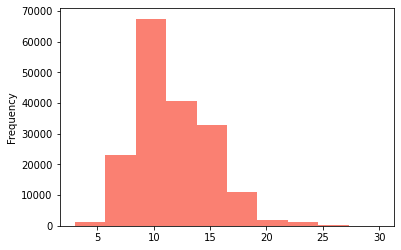

In [ ]:
# Let's check the length of diffrent lines
train_df.total_lines.plot(kind="hist", color="salmon")

### Get list of sentences

In [ ]:
# Convert abstract test lines into lists
train_sentences= train_df["text"].tolist()
val_sentences= val_df["text"].tolist()
test_sentences= test_df["text"].tolist()

len(train_sentences), len(test_sentences), len(val_sentences)

(180040, 30135, 30212)

In [ ]:
# View the first line of train sentence
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

##  Make numeric lables (ML requries numerical data as well as numerical labels)



In [ ]:
# One hot encode lables
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder= OneHotEncoder(sparse=False) # we want non-sparse metrix

train_labels_one_hot= one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot= one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot= one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label encode labels

In [ ]:
# Extract lable ("target" column) and encode them into integers

from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

train_labels_encoder= label_encoder.fit_transform(train_df["target"])
test_lables_encoder= label_encoder.transform(test_df["target"])
val_lables_encoder= label_encoder.transform(val_df["target"])

train_labels_encoder

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get class names and number of classes from LabelEncoder instance
num_classes= len(label_encoder.classes_)
class_names= label_encoder.classes_

num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Starting  a series of modelling experiment...

As usual, we're going to be tring out a bunch od diffrent models and seeing which one works best. And as always, we're going to start witha baseline (TF-IDF Multinomial Naive Bayes classifier).

## Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0= Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline
model_0.fit(train_sentences,
            train_labels_encoder)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evalute baseline model on validation dataset
model_0.score(val_sentences,
              val_lables_encoder)

0.7218323844829869

In [ ]:
# make predictions with ouu baseline model
baseline_preds= model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
val_lables_encoder

array([0, 0, 3, ..., 4, 1, 1])

### Download helper funtions script

In the previous modules, we wrote a funtion to compare predictions across diffrent metrics (accuracy, precision, recall and f1) and rather than rewritting it here, let download it from our helper funtions script

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-03 18:34:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-03 18:34:18 (92.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
# calculate baseline result
baseline_results= calculate_results(val_lables_encoder, 
                                    baseline_preds)

baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Preparing our data (the text) for deep sequence models

Before we start building deeper models, we've got to create vectorization and embedding layers.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
# How long is each sentences on average?
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len= np.mean(sent_len)
avg_sent_len

26.338269273494777

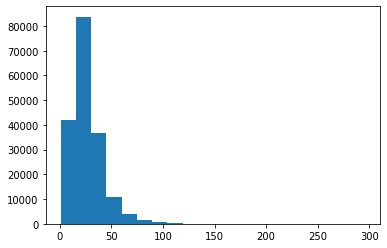

In [ ]:
# What's the distribution looks like?
import matplotlib.pyplot as plt
plt.hist(sent_len, bins=20);

In [ ]:
# how long of a sentence length coverss 95% of the sentences
output_seq_len= int(np.percentile(sent_len, 95))
output_seq_len

55

In [ ]:
# Maximum sequence lenght in the training set
np.max(sent_len)

296

### Create text vectorizer layer


We want to make layer which maps our text from words to numbers

In [ ]:
# How many words are in our vocab? (taken from table 2 in: https://arxiv.org/pdf/1710.06071.pdf )
max_tokens = 68000 

In [ ]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer= TextVectorization(max_tokens= max_tokens, # Numbers of words in vocab 
                                   output_sequence_length = output_seq_len
                                   )

In [ ]:
from pandas.core.groupby.groupby import T
# Adapt text vectorizer to training sententences

text_vectorizer.adapt(train_sentences)

In [ ]:
# let try is on a sample text
sample_text= "The boy is good, but the girl is bad"

text_vectorizer(sample_text)

<tf.Tensor: shape=(55,), dtype=int64, numpy=
array([    2,     1,    20,   745,    72,     2, 38639,    20,  7403,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])>

In [ ]:
# Text our test vectorizer on random sentences
import random

random_sentence= random.choice(train_sentences)
# let pass it into our text vectorizer layer
vec_random_sentence= text_vectorizer(random_sentence)
print(f"Random sentence before passing it into the vectorized layer:\n {random_sentence} \n")
print(f"Random sentence after passing it through the vectorized layer:\n {vec_random_sentence}")

Random sentence before passing it into the vectorized layer:
 the effects of @mg oral thc on olfaction were assessed in a placebo-controlled , randomized cross-over study in healthy volunteers . 

Random sentence after passing it through the vectorized layer:
 [    2    71     4    68   217  6140    18 10234     9   113     5     8
   329    29   484    17     5   247   771     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [ ]:
# Another way
target_sentence= random.choice(train_sentences)
print(f"Text:\n {target_sentence}")
print(f"\nLenght: {len(target_sentence)}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
 using a standardized model for trigeminal-nociceptive stimulation during fmri scanning , we investigated the effect of acetylsalicylic acid on acute pain compared to saline in @ healthy volunteers in a double-blind within-subject design .

Lenght: 238

Vectorized text: [[   59     8   974   314    11 43247   465    52  4116  4058    43   446
      2    70     4 12279   386    18   229    65    34     6   622     5
    247   771     5     8   236  6133   372     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
# How many words in our training vocabulary and the most common words
rct_20k_text_vocab= text_vectorizer.get_vocabulary()

print(f"Numbers of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocab: {rct_20k_text_vocab[-5:]} ")

Numbers of words in vocab: 64841
Most common words in vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp'] 


In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [ ]:
# let create embedding
token_embed= layers.Embedding(input_dim=len(rct_20k_text_vocab), #lenght of vocabulary
                              output_dim= 128, # Note diffrent embedding sizes result in dractical diffrent numbers
                              mask_zero= True, # Use masking to handle variable sequence lenghts (save space) 
                              name= "token_embedding")

In [ ]:
# show example embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentences= text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentences}\n")
embedded_sentences= token_embed(vectorized_sentences)
print(f"Sentence after embedding: \n {embedded_sentences}\n")
print(f"Embedded sentences shape: {embedded_sentences.shape} ")

Sentence before vectorization:
 using a standardized model for trigeminal-nociceptive stimulation during fmri scanning , we investigated the effect of acetylsalicylic acid on acute pain compared to saline in @ healthy volunteers in a double-blind within-subject design .

Sentence after vectorization (before embedding):
 [[   59     8   974   314    11 43247   465    52  4116  4058    43   446
      2    70     4 12279   386    18   229    65    34     6   622     5
    247   771     5     8   236  6133   372     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding: 
 [[[-0.04141352  0.04026801 -0.00095828 ...  0.00859495 -0.02565783
   -0.01846639]
  [ 0.00413229 -0.01045313  0.01911238 ... -0.02789453  0.02445031
   -0.01296414]
  [ 0.04595398 -0.04177228 -0.036147   ...  0.01881205 -0.04353073
    0.01862175]
  ...
  [-0.04876218 -0.00543999  0.01368285 ... -0.032358

### Crearting datasets (making sure our dataset load as possible)

We are going to setup our data to run as fast as possible with the Tensorflow tf.data API, many of the steps here are discussed at lenght in these two resources:

* https://www.tensorflow.org/guide/data_performance

* https://www.tensorflow.org/guide/data

In [ ]:
# Turn our data into tensorflow dataset
train_dataset= tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset= tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_data= tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Take the tensorflowSliceDataset's and turn them into prefected datasets
train_dataset= train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset= valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset= test_data.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D with token embedding

In [ ]:
# Create 1D conv model to preprocess sequence
inputs= layers.Input(shape= (1, ), dtype=tf.string)

text_vectors= text_vectorizer(inputs) # vectorized test inputs
token_embeddings= token_embed(text_vectors) # create embeddings
x= layers.Conv1D(64, 5, activation="relu", padding="same")(token_embeddings)
x= layers.GlobalAveragePooling1D()(x) # Condense the outpute of our feature vector from conv layer
outputs= layers.Dense(num_classes, activation= "softmax")(x)
# create our model
model_1= tf.keras.Model(inputs, outputs)

In [ ]:
# compile 
model_1.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer="Adam",
                metrics= ["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
# Fit the model
history_model_1= model_1.fit(train_dataset,
                             epochs=3,
                             steps_per_epoch= int(0.1 *len(train_dataset)),
                             validation_data= valid_dataset,
                             validation_steps= int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 17s 10ms/step - loss: 0.9146 - accuracy: 0.6400 - val_loss: 0.6937 - val_accuracy: 0.7354
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 0.6619 - accuracy: 0.7556 - val_loss: 0.6341 - val_accuracy: 0.7719
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6192 - accuracy: 0.7744 - val_loss: 0.5970 - val_accuracy: 0.7803


In [ ]:
# Evaluate on the whole validation dataset
model_1.evaluate(valid_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5979 - accuracy: 0.7859


[0.5978916883468628, 0.7859459519386292]

In [ ]:
# Makes prediction and evaluate
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

(array([[4.4582835e-01, 1.5982470e-01, 7.0387922e-02, 2.9572320e-01,
         2.8235825e-02],
        [3.9297888e-01, 3.5636827e-01, 1.2743399e-02, 2.2736551e-01,
         1.0544006e-02],
        [1.2368335e-01, 7.7915946e-03, 1.8330681e-03, 8.6667037e-01,
         2.1649634e-05],
        ...,
        [6.3231105e-06, 8.3045015e-04, 1.1107046e-03, 3.8706658e-06,
         9.9804866e-01],
        [5.8371563e-02, 5.0463712e-01, 7.4508749e-02, 6.3849226e-02,
         2.9863337e-01],
        [2.1703281e-01, 6.2483871e-01, 4.3552246e-02, 6.2349901e-02,
         5.2226376e-02]], dtype=float32), (30212, 5))

In [ ]:
# convert pred probs to classes
model_1_preds= tf.argmax(model_1_pred_probs, axis= 1)
model_1_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
# Calculate model_1_results
model_1_results= calculate_results(y_true=val_lables_encoder, y_pred=model_1_preds)
model_1_results

{'accuracy': 78.59459817291142,
 'precision': 0.7825589532411562,
 'recall': 0.7859459817291142,
 'f1': 0.7834667791494946}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2: Feature extraction with pretrained model

Now let use pretrained word embedding from tensorflow hub, specifically the universal sentence encoder https://tfhub.dev/google/universal-sentence-encoder/4

the paper originallt used GloVe embeddings, howevery, we're going to be using the later created USE pretrained embeddings

to know more about GloVe check out https://nlp.stanford.edu/projects/glove/ 

In [ ]:
# Download pretrained Tensorflow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer= hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                       trainable=False,
                                       name="universal_sentence_encoder")

In [ ]:
# Test out the pretrained embeddings on a random sentence
random_train_sentence= random.choice(train_sentences)
print(f"Random sentence:\n  {random_train_sentence}")
use_embedded_sentence= tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding:\n {use_embedded_sentence[0][:30]}\n")
print(f"Lenght of sentences embedding: {len(use_embedded_sentence[0])} ")

Random sentence:
  in the post-hoc analysis , we measured serum fgf@ , klotho and other biochemical factors ( ca , p , i-pth , hscrp , ldl-c ) in @ haemodialysis patients , who completed a @-week , open-label , controlled randomized parallel-group study .
Sentence after embedding:
 [-0.07739623 -0.03857417 -0.04667522 -0.02946941  0.04707325 -0.02336681
  0.01754733 -0.0654123   0.00389148  0.03030851  0.08054148 -0.03794839
  0.02738975  0.06490865 -0.00748045 -0.02373993 -0.07935037  0.04342904
  0.02696947 -0.05152089  0.0241665   0.03713463 -0.05235355 -0.01314452
  0.04853099  0.00467174 -0.01054229  0.02548666 -0.02771558 -0.0194185 ]

Lenght of sentences embedding: 512 


## Building and fitting an NLP feature extraction model using pretrained embeddings

In [ ]:
# Define feature extraction model using TF Hub layer
inputs= layers.Input(shape= [], dtype= tf.string)
pretrained_embedding= tf_hub_embedding_layer(inputs) # tpkenized text and create embedding of each sequence (512 long vector)
x= layers.Dense(128, activation="relu")(pretrained_embedding)
# Note: you could add more layers here if we wnat to
outputs= layers.Dense(num_classes, activation="softmax")(x)
model_2= tf.keras.Model(inputs,
                        outputs,
                        name= "model_2_USE_feature_extractor")

# Compile the model
model_2.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Let get the summary of our model
model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Let fit out model
history_model_2= model_2.fit(train_dataset,
                             epochs= 3,
                             steps_per_epoch= int(0.1*len(train_dataset)),
                             validation_data= valid_dataset,
                             validation_steps= int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 10s 14ms/step - loss: 0.9153 - accuracy: 0.6515 - val_loss: 0.7978 - val_accuracy: 0.6872
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7700 - accuracy: 0.7016 - val_loss: 0.7560 - val_accuracy: 0.7074
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7534 - accuracy: 0.7108 - val_loss: 0.7415 - val_accuracy: 0.7161


In [ ]:
# Evaluate on thw whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 10s 11ms/step - loss: 0.7427 - accuracy: 0.7143


[0.7426846623420715, 0.7142525911331177]

In [ ]:
# Make some predictions with feature extrection model
model_2_pred_probs= model_2.predict(valid_dataset)
model_2_pred_probs

array([[4.2915040e-01, 3.7699553e-01, 2.3779173e-03, 1.8501553e-01,
        6.4606634e-03],
       [3.3826450e-01, 5.0710976e-01, 3.1459022e-03, 1.4904620e-01,
        2.4336334e-03],
       [2.3524770e-01, 1.5230733e-01, 1.7087007e-02, 5.5799568e-01,
        3.7362281e-02],
       ...,
       [2.3931160e-03, 8.2621267e-03, 5.9981309e-02, 8.4521616e-04,
        9.2851824e-01],
       [4.1655041e-03, 4.7167737e-02, 1.8278894e-01, 1.5054464e-03,
        7.6437241e-01],
       [1.8888754e-01, 2.4513325e-01, 5.0053275e-01, 6.9653951e-03,
        5.8481079e-02]], dtype=float32)

In [ ]:
test= model_2_pred_probs[0]
print(test)
np.argmax(test)

[0.4291504  0.37699553 0.00237792 0.18501553 0.00646066]


0

In [ ]:
# Convert the prediction probability found with feature  extraction lable with
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
# Calculate results
model_2_result= calculate_results(y_true= val_lables_encoder,
                                  y_pred= model_2_preds)

model_2_result

{'accuracy': 71.42526148550245,
 'precision': 0.7141979685065333,
 'recall': 0.7142526148550244,
 'f1': 0.7114286821903044}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### Model 3: Conv1D with character embeddings

The paper which we're replicating states that they use a combination of token and character-level embeddings.
Previusely we've token-level embeddings but we'll need to do similar steps for characters if we want to use chat-level embedings.

### Create a character-level tokenizer 

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
# Make funtion to split sentence into character
def split_chars(text):
  return " ".join(list(text))

# Text splitting non-character-level sequenc into characters
split_chars(random_train_sentence)


'i n   t h e   p o s t - h o c   a n a l y s i s   ,   w e   m e a s u r e d   s e r u m   f g f @   ,   k l o t h o   a n d   o t h e r   b i o c h e m i c a l   f a c t o r s   (   c a   ,   p   ,   i - p t h   ,   h s c r p   ,   l d l - c   )   i n   @   h a e m o d i a l y s i s   p a t i e n t s   ,   w h o   c o m p l e t e d   a   @ - w e e k   ,   o p e n - l a b e l   ,   c o n t r o l l e d   r a n d o m i z e d   p a r a l l e l - g r o u p   s t u d y   .'

In [ ]:
# Split sequence-level data splits into character-lele data splites
train_chars= [split_chars(sentence) for sentence in train_sentences]
val_chars= [split_chars(sentence) for sentence in val_sentences]
test_chars= [split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
# What's the average character lenght
char_lens= [len(sentence) for sentence in train_sentences]
mean_char_len= np.mean(char_lens)
mean_char_len

149.3662574983337

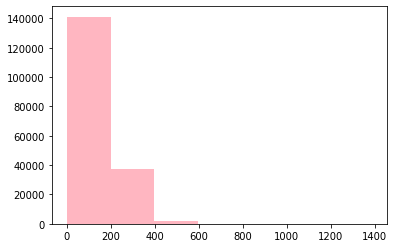

In [ ]:
# Check the distribution of our sequence at our character level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins= 7, color="lightpink");

In [ ]:
# Find what charecter lenght covers 95% of sequences

output_seq_char_len= int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
# Let get the maximim of out chat len
np.max(char_lens)

1386

In [ ]:
random.choice(train_sentences)

'post-exercise studies were acquired at @ @ minutes after radiotracer injection ( stress-@ ) and repeated at @ @ minutes ( stress-@ ) .'

In [ ]:
# Get all keyboard character
import string

alphabet= string.ascii_lowercase + string.digits + string.punctuation

alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS= len(alphabet) + 2 # add 2 for space and OOV token (OOV= out of vocabulary also represented as [UNK])

char_vectorizer= TextVectorization(max_tokens= NUM_CHAR_TOKENS,
                                   output_sequence_length= output_seq_char_len,
                                   name= "char_vectorizer")

In [ ]:
# Adapt character vectorizer to trainnig character
char_vectorizer.adapt(train_chars)

In [ ]:
# Check charcter vocab stats
# How many words in our training vocabulary and the most common words
char_vocab= char_vectorizer.get_vocabulary()

print(f"Numbers of words in vocab: {len(char_vocab)}")
print(f"Most common words in vocab: {char_vocab[:5]}")
print(f"Least common words in the vocab: {char_vocab[-5:]} ")

Numbers of words in vocab: 28
Most common words in vocab: ['', '[UNK]', 'e', 't', 'i']
Least common words in the vocab: ['k', 'x', 'z', 'q', 'j'] 


In [ ]:
from numpy.lib.function_base import vectorize
# Test our cha= racter vectorizer
random_train_chars= random.choice(train_chars)
print(f"\nCharified text:\n {random_train_chars}")
print(f"\nLenght of random_train_chars: {len(random_train_chars.split())}")

vectorized_chars= char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"Length of vectorized chars:\n {len(vectorized_chars[0])} ")


Charified text:
 a t   b a s e l i n e   ,   >   @   %   o f   i n f a n t s   h a d   >   @   u n i t s   o f   a n t i - r o t a v i r u s   i g a   .

Lenght of random_train_chars: 53

Vectorized chars:
 [[ 5  3 22  5  9  2 12  4  6  2  7 17  4  6 17  5  6  3  9 13  5 10 16  6
   4  3  9  7 17  5  6  3  4  8  7  3  5 21  4  8 16  9  4 18  5  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

### Creating Character embedding layer

In [ ]:
# Create char embedding layer
char_embed= layers.Embedding(input_dim=len(char_vocab),
                             output_dim= 25, # this is the size of char in the paper
                             name="char_embed")

In [ ]:
# Text our character embedding layer
print(f"Charified text:\n {random_train_chars}\n")
char_embed_example= char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars. (after vectorization and embedding):\n {char_embed_example}\n")
print(f"Shape of Embeded chars: {char_embed_example.shape}")

Charified text:
 a t   b a s e l i n e   ,   >   @   %   o f   i n f a n t s   h a d   >   @   u n i t s   o f   a n t i - r o t a v i r u s   i g a   .

Embedded chars. (after vectorization and embedding):
 [[[-0.0134163   0.0398509  -0.03633007 ...  0.01555597 -0.04420818
    0.02439484]
  [ 0.01539988 -0.04891905  0.00696728 ...  0.03394211 -0.0356655
    0.04396549]
  [-0.00654634 -0.01076999  0.04432834 ... -0.00855712  0.02906426
   -0.03230388]
  ...
  [ 0.02940882  0.01247598  0.04779465 ... -0.04653182 -0.01830745
   -0.02547383]
  [ 0.02940882  0.01247598  0.04779465 ... -0.04653182 -0.01830745
   -0.02547383]
  [ 0.02940882  0.01247598  0.04779465 ... -0.04653182 -0.01830745
   -0.02547383]]]

Shape of Embeded chars: (1, 290, 25)


### Charcter level embedding using bi-directional lstm

In [ ]:
# Create char level dataset
train_char_dataset= tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset= tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset= tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
forward_layer = layers.LSTM(128, return_sequences=True)
backward_layer = layers.LSTM(128, activation='relu', return_sequences=True,
                       go_backwards=True)

In [ ]:
# setup our inputs
inputs= layers.Input(shape=(1,), dtype=tf.string)
char_vector= char_vectorizer(inputs)
char_embed_layer= char_embed(char_vector) 
# Let pass it into our bi-directional lstm layer
x= layers.Bidirectional(forward_layer, backward_layer=backward_layer)(char_embed_layer)

print(f"Shape after bidirectinal later {x.shape}")
x= layers.GlobalAveragePooling1D()(x)
x= layers.Dense(128, activation="relu")(x)
outputs= layers.Dense(num_classes, activation="softmax")(x)   

bi_model= tf.keras.Model(inputs, outputs)

Shape after bidirectinal later (None, 290, 256)


In [ ]:
# Let compile our model
bi_model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics= ["accuracy"])

# let get the summary of our model
bi_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 bidirectional (Bidirectiona  (None, 290, 256)         157696    
 l)                                                              
                                                                 
 global_average_pooling1d_1   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                           

In [ ]:
train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
# # Let fit our model
# history_bi_model= bi_model.fit(train_char_dataset,
#                                epochs=3,
#                                steps_per_epoch= (0.1 *len(train_char_dataset)),
#                                validation_data= val_char_dataset,
#                                validation_steps= int(0.1 * len(val_char_dataset))
#                                )

In [ ]:
# # Let evaluate our model on the whole val_data
# bi_model.evaluate()

### Building Cond1D model to fit on character embeddings

In [ ]:
# Make Conv1D on chars only
inputs= layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings= char_embed(char_vectors)
x= layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x= layers.GlobalMaxPooling1D()(x)
outputs= layers.Dense(num_classes, activation="softmax")(x)


model_3 = tf.keras.Model(inputs,
                         outputs,
                         name="model_3_conv1d_char_embeddings")

In [ ]:
from tensorflow.python import metrics
# Compile 
model_3.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [ ]:
# summary of our model
model_3.summary()

Model: "model_3_conv1d_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 

In [ ]:
# Let fit our model
model_3_history= model_3.fit(train_char_dataset,
                               epochs=3,
                               steps_per_epoch= (0.1 *len(train_char_dataset)),
                               validation_data= val_char_dataset,
                               validation_steps= int(0.1 * len(val_char_dataset))
                               )

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2525 - accuracy: 0.4936 - val_loss: 1.0300 - val_accuracy: 0.5861
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 0.9914 - accuracy: 0.6007 - val_loss: 0.9264 - val_accuracy: 0.6363
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9225 - accuracy: 0.6337 - val_loss: 0.8698 - val_accuracy: 0.6619


In [ ]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.8890 - accuracy: 0.6533


[0.8889568448066711, 0.6533165574073792]

Nice! Looks like our character-level model is working, let's make some predictions with it and evaluate them.

In [ ]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.21850011, 0.2885423 , 0.09750013, 0.36957788, 0.02587953],
       [0.1499534 , 0.6017556 , 0.01532117, 0.15346019, 0.0795096 ],
       [0.17079799, 0.3108907 , 0.11990767, 0.3862643 , 0.01213933],
       ...,
       [0.00856746, 0.02448848, 0.16533418, 0.01953208, 0.7820778 ],
       [0.02942919, 0.21801884, 0.19909218, 0.0286732 , 0.5247866 ],
       [0.4484288 , 0.4022196 , 0.04875765, 0.09418079, 0.00641309]],
      dtype=float32)

In [ ]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 3, ..., 4, 4, 0])>

In [ ]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_lables_encoder,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 65.33165629551172,
 'precision': 0.658663018980948,
 'recall': 0.6533165629551172,
 'f1': 0.6409443647697846}

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

Alright, now things are going to get spicy.

In moving closer to build a model similar to the one in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it's time we tackled the hybrid token embedding layer they speak of.

This hybrid token embedding layer is a combination of token embeddings and character embeddings. In other words, they create a stacked embedding to represent sequences before passing them to the sequence label prediction layer.

So far we've built two models which have used token and character-level embeddings, however, these two models have used each of these embeddings exclusively.

To start replicating (or getting close to replicating) the model in Figure 1, we're going to go through the following steps:
1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
5. Construct a model which takes token and character-level sequences as input and produces sequence label probabilities as output

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

Woah... There's a lot going on here, let's get a summary and plot our model to visualize what's happening.

In [ ]:
# Get summary of token and character model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

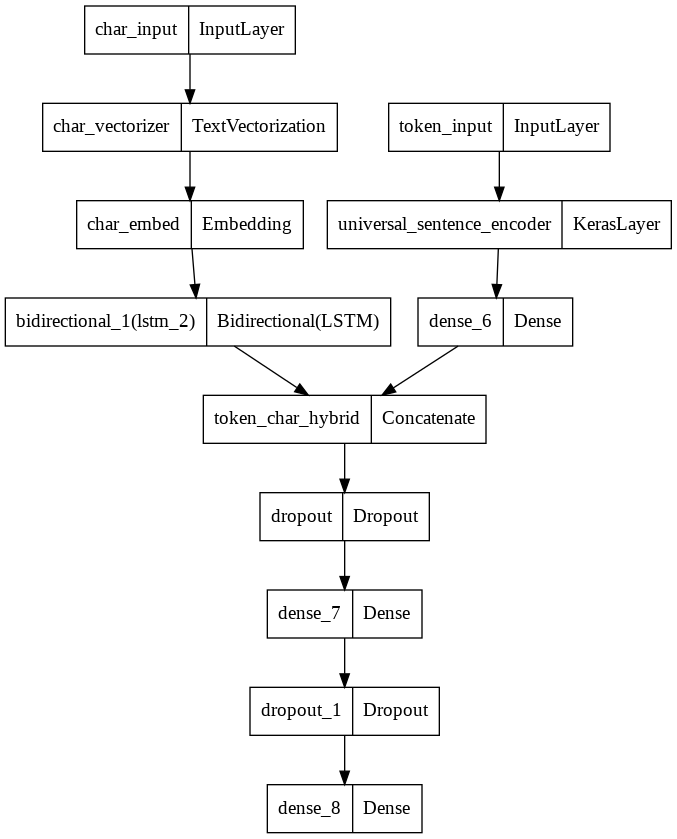

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

Now that's a good looking model. Let's compile it just as we have the rest of our models.

> 🔑 **Note:** Section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) mentions using the SGD (stochastic gradient descent) optimizer, however, to stay consistent with our other models, we're going to use the Adam optimizer. As an exercise, you could try using [`tf.keras.optimizers.SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) instead of [`tf.keras.optimizers.Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and compare the results.

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

And again, to keep our experiments fast, we'll fit our token-character-hybrid model on 10% of training and validate on 10% of validation batches. However, the difference with this model is that it requires two inputs, token-level sequences and character-level sequences.

We can do this by create a `tf.data.Dataset` with a tuple as it's first input, for example:
* `((token_data, char_data), (label))`

Let's see it in action.

### Combining token and character data into a `tf.data` dataset

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting a model on token and character-level sequence

In [ ]:
history_model_4= model_4.fit(train_char_token_dataset,
                             steps_per_epoch= int(0.1 *len(train_char_token_dataset)),
                             epochs=3,
                             validation_data= val_char_token_dataset,
                             validation_steps= int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 27s 39ms/step - loss: 0.9645 - accuracy: 0.6198 - val_loss: 0.7890 - val_accuracy: 0.6915
Epoch 2/3
562/562 [==============================] - 20s 35ms/step - loss: 0.7973 - accuracy: 0.6903 - val_loss: 0.7184 - val_accuracy: 0.7291
Epoch 3/3
562/562 [==============================] - 20s 35ms/step - loss: 0.7680 - accuracy: 0.7070 - val_loss: 0.6902 - val_accuracy: 0.7404


In [ ]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 21s 22ms/step - loss: 0.6951 - accuracy: 0.7353


[0.6951060891151428, 0.73533695936203]

In [ ]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

array([[4.11015511e-01, 3.61454666e-01, 3.61435185e-03, 2.20438451e-01,
        3.47701227e-03],
       [3.62460434e-01, 4.25518155e-01, 3.19359801e-03, 2.07455248e-01,
        1.37250056e-03],
       [3.48525345e-01, 1.09379426e-01, 4.14800458e-02, 4.78559047e-01,
        2.20561214e-02],
       ...,
       [3.69951449e-04, 7.13490834e-03, 4.85593863e-02, 1.00105884e-04,
        9.43835616e-01],
       [6.70091482e-03, 4.63403165e-02, 2.81874150e-01, 2.42905691e-03,
        6.62655592e-01],
       [3.74986470e-01, 3.24101835e-01, 2.14281440e-01, 4.51899841e-02,
        4.14402261e-02]], dtype=float32)

In [ ]:
# Format pred probs into pred labels
model_4_preds= tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [ ]:
# Get results of token-char-hybrid model
model_4_results = calculate_results(val_lables_encoder,
                                    model_4_preds)

model_4_results

{'accuracy': 73.53369522044221,
 'precision': 0.7368377538922676,
 'recall': 0.7353369522044221,
 'f1': 0.7323729991750443}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 5: Transfer Learning with token embeddings + character embeddings + positional embeddings

In [ ]:
train_df.head(20)

target                                               text  \
0     OBJECTIVE  to investigate the efficacy of @ weeks of dail...   
1       METHODS  a total of @ patients with primary knee oa wer...   
2       METHODS  outcome measures included pain reduction and i...   
3       METHODS  pain was assessed using the visual analog pain...   
4       METHODS  secondary outcome measures included the wester...   
5       METHODS  serum levels of interleukin @ ( il-@ ) , il-@ ...   
6       RESULTS  there was a clinically relevant reduction in t...   
7       RESULTS  the mean difference between treatment arms ( @...   
8       RESULTS  further , there was a clinically relevant redu...   
9       RESULTS  these differences remained significant at @ we...   
10      RESULTS  the outcome measures in rheumatology clinical ...   
11  CONCLUSIONS  low-dose oral prednisolone had both a short-te...   
12   BACKGROUND  emotional eating is associated with overeating...   
13   BACKGROUND  yet , empirical evidence for individual ( trai...   
14    OBJECTIVE  the aim of this study was to test if attention...   
15    OBJECTIVE  it was expected that emotional eating is predi...   
16      METHODS  participants ( n = @ ) were randomly assigned ...   
17      METHODS  attentional biases for high caloric foods were...   
18      METHODS  self-reported emotional eating was assessed wi...   
19      RESULTS  hierarchical multivariate regression modeling ...   

    line_number  total_lines  
0             0           11  
1             1           11  
2             2           11  
3             3           11  
4             4           11  
5             5           11  
6             6           11  
7             7           11  
8             8           11  
9             9           11  
10           10           11  
11           11           11  
12            0           10  
13            1           10  
14            2           10  
15            3           10  
16            4           10  
17            5           10  
18            6           10  
19            7           10

**Note** Any engineered features used to train a model needs to be available at test time. In our case, line number and total lines are avaliable

### Create positinal embeddings

In [ ]:
# How many diffrent line numbers are there? 
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

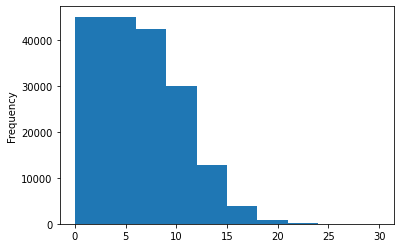

In [ ]:
# Check the distribution of line number column
train_df.line_number.plot.hist();

In [ ]:
# Use tensorflow to create one_hot_encoded of our model 

train_line_numbers_one_hot= tf.one_hot(train_df["line_number"].to_numpy(), 15)
val_line_numbers_one_hot= tf.one_hot(val_df["line_number"].to_numpy(), 15)
test_line_numbers_one_hot= tf.one_hot(test_df["line_number"].to_numpy(), 15)
train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([180040, 15]))

Now we've encoded our lins numbers feature, let's do the same for our total lines features

In [ ]:
# Let do the same thing for total lines
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

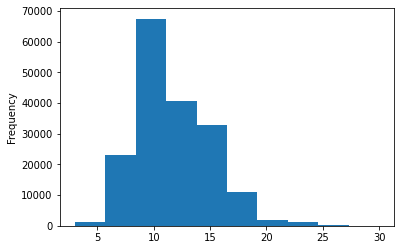

In [ ]:
# Let check the distribution
train_df["total_lines"].plot.hist()

In [ ]:
# Check the coverage of total_lines value of 20
np.percentile(train_df["total_lines"], 98)

20.0

In [ ]:
# Use Tensorflow to create one_hot_encoded tensor of our "total_lines" features
train_total_lines_one_hot= tf.one_hot(train_df["total_lines"].to_numpy() , depth=20)
val_total_lines_one_hot= tf.one_hot(val_df["total_lines"].to_numpy() , depth=20)
test_total_lines_one_hot= tf.one_hot(test_df["total_lines"].to_numpy() , depth=20)
train_total_lines_one_hot[:10]

<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
     

### Building a tribrid embedding model

1. Create a token-level model
2. Create a character-level model
3. Create a model for the `line_number` feature
4. Create a model for the `total_line` features
5. Combine the outputs of 1 & 2 using `tf.keras.layers.Concatenate`
6. Combine the outputs of 3, 4, 5, using `tf.keras.layers.Concatenate`
7. Create an output layes to accept the tribried embedding and outpute label probabilites 
8. Combine the input of 1, 2, 3, 4 an the output of 7 to a `tf.keras.Model`


In [ ]:
train_line_numbers_one_hot.shape

TensorShape([180040, 15])

In [ ]:
# 1. Token inputs
token_inputs= layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings= tf_hub_embedding_layer(token_inputs)
token_outputs= layers.Dense(128, activation="relu")(token_embeddings)
token_model= tf.keras.Model(inputs= token_inputs,
                            outputs= token_outputs)

#2.  Create character embedding layers
char_inputs= layers.Input(shape= (1, ), dtype="string")
char_vectors= char_vectorizer(char_inputs)
char_embeddings= char_embed(char_vectors)
char_bi_lstm= layers.Bidirectional(layers.LSTM(24,))(char_embeddings)
# char_outputs= layers.Dense(128, activation="relu")(char_bi_lstm)
char_model= tf.keras.Model(inputs= char_inputs,
                           outputs= char_bi_lstm)

#3.  Line number model
line_inputs= layers.Input(shape=(15,), dtype=tf.float32, name="line_number_input")
x= layers.Dense(32, activation="relu")(line_inputs)
line_model= tf.keras.Model(inputs= line_inputs,
                           outputs= x)


#4.  Total line model
total_line_inputs= layers.Input(shape=(20, ), dtype= tf.float32, name="total_number_input")
y= layers.Dense(32, activation="relu")(total_line_inputs)
total_lines_model= tf.keras.Model(inputs= total_line_inputs,
                                 outputs=y)


#5.  Combine token and char embedding into a hybrid embeddings
combined_embeddings= layers.Concatenate(name="char_token_hybrid_embedding")([token_model.output,
                                                                            char_model.output])

z= layers.Dense(256, activation="relu")(combined_embeddings)
z= layers.Dropout(0.5)(z)

#6. Combine positional embedding with combined token and char embeddings
tribrid_embeddings = layers.Concatenate(name="char_token_positional_embedding")([line_model.output,
                                                                                 total_lines_model.output,
                                                                                 z])

# 7. Create output layer
output_layer= layers.Dense(5, activation="softmax", name="output_layer")(tribrid_embeddings)

# 8 Put together model with all kinds of inputs
model_5= tf.keras.Model(inputs=[line_model.inputs,
                                total_lines_model.inputs,
                                token_model.inputs,
                                char_model.input],
                        outputs= output_layer,
                        name="model_5_tribrid_embedding_model")

In [ ]:
# Get a summary ot our tribid embedding model
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['input_10[0][0]']               
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['t

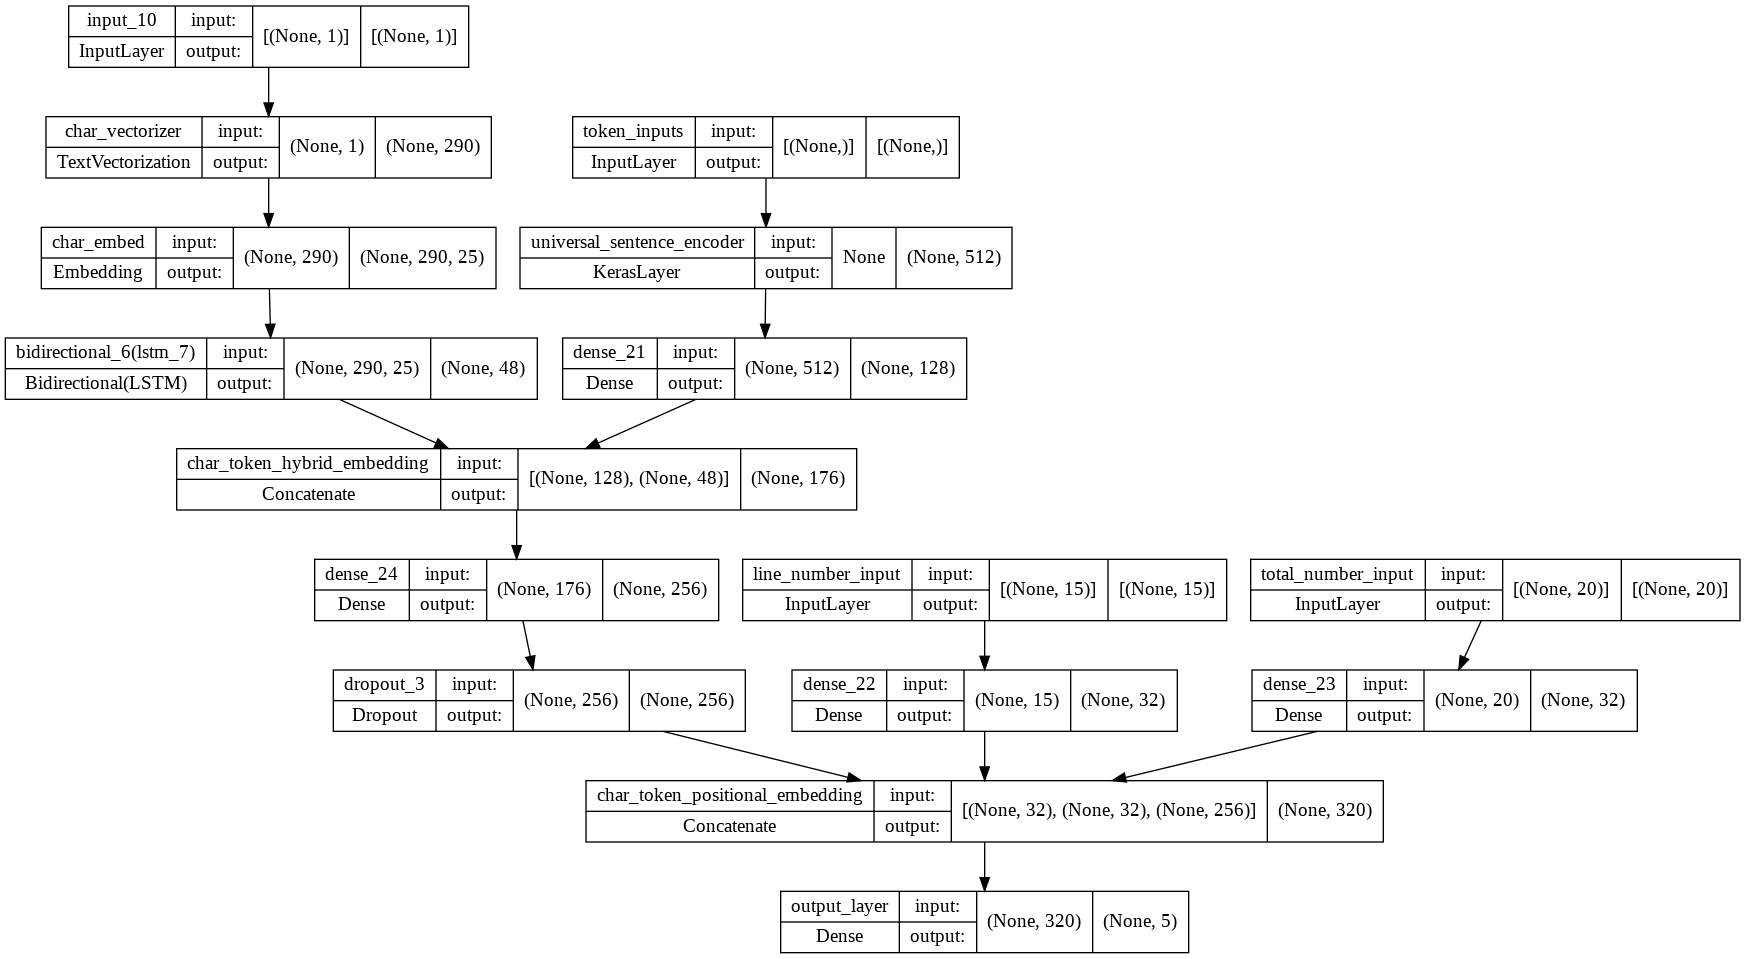

In [ ]:
# Let plot our model arc
plot_model(model_5, show_shapes= True)

What is label smooting?

For example, if our model gets too confident on a single class (e.g its predicts probability is really high), it may get stuck on that class and not consider other classes...

Really confident: `[0.0, 0.0, 1.0, 0.0, 0.0]`

What label smothing does is that is assings some of the value from the higest preds prob to other classes, in turn, hopefully improving generalization: `[0.01, 0.01, 0.96, 0.01, 0.01]`

for mode on label smoothing, see this blog post from pyimagesearch:
https://pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/

In [ ]:
# Compine token, char, and positional embedding model
model_5.compile(loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # helps to prevent overfitting
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
train_chars

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
# Create traning and validation datasets (with all four kinds of input data)

train_char_token_pos_data= tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                    train_total_lines_one_hot,
                                                                    train_sentences,
                                                                    train_chars,
                                                                    ))
train_char_token_pos_labels= tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset= tf.data.Dataset.zip((train_char_token_pos_data,
                                                   train_char_token_pos_labels))

train_char_token_pos_dataset= train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# Do the same for our val datasets

val_char_token_pos_data= tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                                    val_total_lines_one_hot,
                                                                    val_sentences,
                                                                    val_chars))
val_char_token_pos_labels= tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset= tf.data.Dataset.zip((val_char_token_pos_data,
                                                   val_char_token_pos_labels))

val_char_token_pos_dataset= val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
print(train_char_token_pos_dataset)
print(val_char_token_pos_dataset)

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>
<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>


### Fitting, evaluating and making predictions with our tribrid model

In [ ]:
history_model_5= model_5.fit(train_char_token_pos_dataset,
                             epochs=3,
                             steps_per_epoch= int(0.1 * len(train_char_token_pos_dataset)),
                             validation_data= val_char_token_pos_dataset,
                             validation_steps= int(0.1 * len(val_char_token_pos_dataset)),
                             )

Epoch 1/3
562/562 [==============================] - 27s 39ms/step - loss: 1.0977 - accuracy: 0.7219 - val_loss: 0.9847 - val_accuracy: 0.8029
Epoch 2/3
562/562 [==============================] - 20s 35ms/step - loss: 0.9687 - accuracy: 0.8118 - val_loss: 0.9500 - val_accuracy: 0.8278
Epoch 3/3
562/562 [==============================] - 25s 45ms/step - loss: 0.9525 - accuracy: 0.8219 - val_loss: 0.9390 - val_accuracy: 0.8308


In [ ]:
# Let evaluate our model on the whole validation dataset
model_5_evaluate= model_5.evaluate(val_char_token_pos_dataset)
model_5_evaluate

945/945 [==============================] - 21s 22ms/step - loss: 0.9372 - accuracy: 0.8318


[0.9372167587280273, 0.8317555785179138]

In [ ]:
# Let make predictions with our tribrid model
model_5_pred_probs= model_5.predict(val_char_token_pos_dataset)
model_5_pred_probs

array([[0.50458056, 0.09673295, 0.01192337, 0.36788538, 0.01887775],
       [0.50894344, 0.10846025, 0.06386567, 0.30692995, 0.01180071],
       [0.22341453, 0.10404927, 0.12061797, 0.48792946, 0.06398885],
       ...,
       [0.03591972, 0.11965894, 0.05076424, 0.03214585, 0.76151127],
       [0.03192696, 0.30045512, 0.08761347, 0.02555791, 0.5544465 ],
       [0.29733104, 0.5018334 , 0.09486855, 0.04845095, 0.05751604]],
      dtype=float32)

In [ ]:
# Let get our predictions
model_5_preds= tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Let calculate our model_5_result
model_5_results= calculate_results(y_true= val_lables_encoder,
                                  y_pred= model_5_preds)

model_5_results

{'accuracy': 83.17555938037866,
 'precision': 0.8304361634466069,
 'recall': 0.8317555938037866,
 'f1': 0.8307254762581188}

### Combaring model results

In [ ]:
# Combine model results into a DataFrame
all_model_results= pd.DataFrame({"baseline": baseline_results,
                                 "model_1_custom_token_embedding": model_1_results,
                                 "model_2_pretrained_token_embedding": model_2_result,
                                 "model_3_custom_char_embedding": model_3_results,
                                 "model_4_hybrid_char_token_embedding": model_4_results,
                                 "model_5_pos_char_token_embedding": model_5_results})

all_model_results=all_model_results.T
all_model_results

accuracy  precision    recall        f1
baseline                             72.183238   0.718647  0.721832  0.698925
model_1_custom_token_embedding       78.594598   0.782559  0.785946  0.783467
model_2_pretrained_token_embedding   71.425261   0.714198  0.714253  0.711429
model_3_custom_char_embedding        65.331656   0.658663  0.653317  0.640944
model_4_hybrid_char_token_embedding  73.533695   0.736838  0.735337  0.732373
model_5_pos_char_token_embedding     83.175559   0.830436  0.831756  0.830725

In [ ]:
# Reduce the accuracy to same scal as other model
all_model_results["accuracy"]=all_model_results["accuracy"]/100

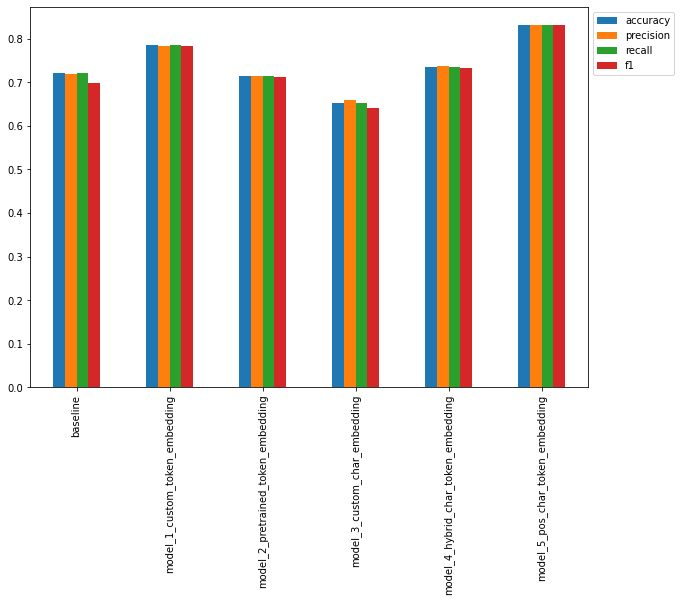

In [ ]:
from matplotlib.patches import bbox_artist
all_model_results.plot(kind="bar", figsize= (10, 7)).legend(bbox_to_anchor= (1.0, 1.0))

Text(0, 0.5, 'Accuracy')

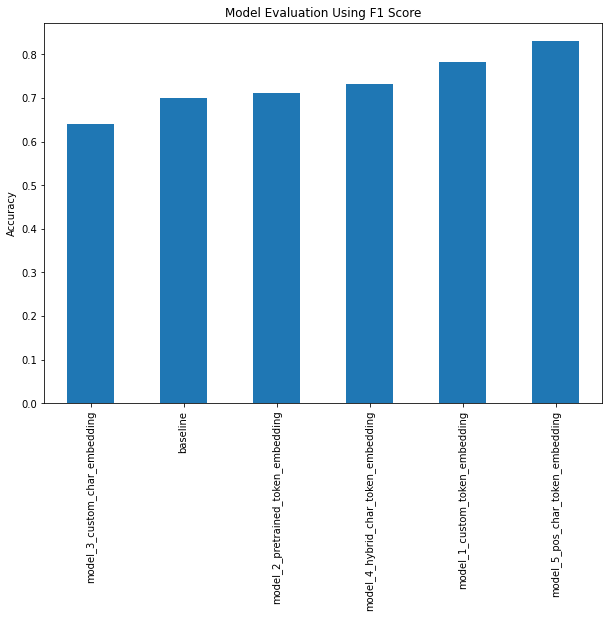

In [ ]:
# Sort the models results by f1-score
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(10, 7))
plt.title("Model Evaluation Using F1 Score")
plt.ylabel("Accuracy")

## Save and exporting our model

In [ ]:
model_5.save("drive/MyDrive/skimlit_tribrid_model")

In [ ]:
loaded_model = tf.keras.models.load_model("drive/MyDrive/skimlit_tribrid_model")

In [ ]:
# Let evalute our loaded model
loaded_model.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 23s 23ms/step - loss: 0.9372 - accuracy: 0.8318


[0.9372167587280273, 0.8317555785179138]

### Making prediction on the test dataset

Wow, we have made it this far, congratulations, let start to make predictions on our test set datasets

In [ ]:
# Let load our data
test_df

target                                               text  \
0       BACKGROUND  this study analyzed liver function abnormaliti...   
1          RESULTS  a post hoc analysis was conducted with the use...   
2          RESULTS  liver function tests ( lfts ) were measured at...   
3          RESULTS  survival analyses were used to assess the asso...   
4          RESULTS  the percentage of patients with abnormal lfts ...   
...            ...                                                ...   
30130      RESULTS  there was a statistically significant between-...   
30131      RESULTS  there were no statistically significant betwee...   
30132      RESULTS  there was no significant association between s...   
30133      RESULTS                 no adverse effects were reported .   
30134  CONCLUSIONS  performing a @-week do-as-tolerated program of...   

       line_number  total_lines  
0                0            8  
1                1            8  
2                2            8  
3                3            8  
4                4            8  
...            ...          ...  
30130           13           17  
30131           14           17  
30132           15           17  
30133           16           17  
30134           17           17  

[30135 rows x 4 columns]

## Spliting our test dataset into training and labels

In [ ]:
# Let get our test data
test_data= test_df["text"]
test_labels= test_df["target"]

In [ ]:
test_data[0]

'this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .'

In [ ]:
# Let label encode our train label
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
test_labels_encoder= label_encoder.fit_transform(test_labels)
test_labels_encoder

array([0, 4, 4, ..., 4, 4, 1])

Looks like we are done preprocessing our test labels, let preprocess our train labels

In [ ]:
test_sentences[0]

'this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .'

### Creating charcter embeddings for our model

In [ ]:
" ".join(list(test_sentences[0]))

't h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i l u r e   p a t i e n t s   a d m i t t e d   w i t h   s e v e r e   a c u t e   d e c o m p e n s a t e d   h e a r t   f a i l u r e   (   a d h f   )   .'

In [ ]:
# creating char_embed_test_sentence

def split_words(text):
  return " ".join(text)

In [ ]:
random_sentence
split_words(random_sentence)

't h e   e f f e c t s   o f   @ m g   o r a l   t h c   o n   o l f a c t i o n   w e r e   a s s e s s e d   i n   a   p l a c e b o - c o n t r o l l e d   ,   r a n d o m i z e d   c r o s s - o v e r   s t u d y   i n   h e a l t h y   v o l u n t e e r s   .'

In [ ]:
test_char = [split_words(sentences) for sentences in test_sentences]
test_char

['t h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i l u r e   p a t i e n t s   a d m i t t e d   w i t h   s e v e r e   a c u t e   d e c o m p e n s a t e d   h e a r t   f a i l u r e   (   a d h f   )   .',
 'a   p o s t   h o c   a n a l y s i s   w a s   c o n d u c t e d   w i t h   t h e   u s e   o f   d a t a   f r o m   t h e   e v a l u a t i o n   s t u d y   o f   c o n g e s t i v e   h e a r t   f a i l u r e   a n d   p u l m o n a r y   a r t e r y   c a t h e t e r i z a t i o n   e f f e c t i v e n e s s   (   e s c a p e   )   .',
 'l i v e r   f u n c t i o n   t e s t s   (   l f t s   )   w e r e   m e a s u r e d   a t   @   t i m e   p o i n t s   f r o m   b a s e l i n e   ,   a t   d i s c h a r g e   ,   a n d   u p   t o   @   m o n t h s   f o l l o w - u p   .',
 's u r v i v a l   a n a l y s e s   w e r e   u s e d   t o   a s s e s s   t h e   a s s o c i a t i o n   b e t w e 

### Preprocessing our `line_number`

out model was trained on a one_hot_encoded `line_number` and `total_line` with a depth of `15`and `20` respectively

In [ ]:
test_line_number_one_hot= tf.one_hot(test_df["line_number"], depth=15)
test_total_line_one_hot= tf.one_hot(test_df["total_lines"], depth= 20)

In [ ]:
test_total_line_one_hot

<tf.Tensor: shape=(30135, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [ ]:
test_line_number_one_hot

<tf.Tensor: shape=(30135, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

## Creating text data 

In [ ]:
test_char

"this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) . a post hoc analysis was conducted with the use of data from the evaluation study of congestive heart failure and pulmonary artery catheterization effectiveness ( escape ) . liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up . survival analyses were used to assess the association between admission model of end-stage liver disease excluding international normalized ratio ( meld-xi ) scores and patient outcome.there was a high prevalence of abnormal baseline ( admission ) lfts ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) . the percentage of patients with abnormal lfts decreased significantly from baseline to @-months ' follow-up . when mean hemodynamic profiles were compared in patients with abnormal versus normal lfts , elevate

In [ ]:
test_data= tf.data.Dataset.from_tensor_slices((test_line_number_one_hot,
                                               test_total_line_one_hot,
                                               test_sentences,
                                               test_char))
test_label= tf.data.Dataset.from_tensor_slices(test_labels_encoder)

test_char_token_dataset= tf.data.Dataset.zip((test_data, test_label))
test_char_token_dataset= test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
print(test_char_token_dataset)

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Wow, looks like out test dataset has been preprocessed and its read for predictions

### Test_datset predictions

In [ ]:
test_data_pred_probs= loaded_model.predict(test_char_token_dataset)
test_data_pred_probs

array([[0.36925134, 0.07497254, 0.04240227, 0.4541464 , 0.05922736],
       [0.35795584, 0.06763165, 0.23154846, 0.3103912 , 0.03247285],
       [0.06589679, 0.022048  , 0.80604213, 0.07714442, 0.02886867],
       ...,
       [0.07604361, 0.08903847, 0.08330492, 0.05530563, 0.69630736],
       [0.07699013, 0.08997764, 0.08323481, 0.05135941, 0.69843805],
       [0.08130118, 0.61589515, 0.12472898, 0.05292387, 0.12515077]],
      dtype=float32)

Wow, looks like we have prediction probabilities, let get our predictions

In [ ]:
test_data_pred= tf.argmax(test_data_pred_probs, axis=1)
test_data_pred

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 0, 2, ..., 4, 4, 1])>

In [ ]:
test_labels_encoder

array([0, 4, 4, ..., 4, 4, 1])

In [ ]:
# Let index it to our test_labels
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [ ]:
y= class_names[test_data_pred]

In [ ]:
y[:20]

array(['OBJECTIVE', 'BACKGROUND', 'METHODS', 'METHODS', 'RESULTS',
       'RESULTS', 'RESULTS', 'CONCLUSIONS', 'RESULTS', 'BACKGROUND',
       'OBJECTIVE', 'METHODS', 'METHODS', 'METHODS', 'RESULTS', 'RESULTS',
       'RESULTS', 'RESULTS', 'RESULTS', 'RESULTS'], dtype=object)

In [ ]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_data_pred]
test_pred_classes[:20]

CPU times: user 11.5 s, sys: 1.08 s, total: 12.6 s
Wall time: 10.7 s


['OBJECTIVE',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS']

In [ ]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_data_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

target                                               text  \
0    BACKGROUND  this study analyzed liver function abnormaliti...   
1       RESULTS  a post hoc analysis was conducted with the use...   
2       RESULTS  liver function tests ( lfts ) were measured at...   
3       RESULTS  survival analyses were used to assess the asso...   
4       RESULTS  the percentage of patients with abnormal lfts ...   
5       RESULTS  when mean hemodynamic profiles were compared i...   
6       RESULTS  multivariable analyses revealed that patients ...   
7   CONCLUSIONS  abnormal lfts are common in the adhf populatio...   
8   CONCLUSIONS  elevated meld-xi scores are associated with po...   
9    BACKGROUND  minimally invasive endovascular aneurysm repai...   
10   BACKGROUND  the aim of this study was to analyse the cost-...   
11      METHODS  resource use was determined from the amsterdam...   
12      METHODS  the analysis was performed from a provider per...   
13      METHODS  all costs were calculated as if all patients h...   
14      RESULTS            a total of @ patients were randomized .   
15      RESULTS  the @-day mortality rate was @ per cent after ...   
16      RESULTS  at @months , the total mortality rate for evar...   
17      RESULTS  the mean cost difference between evar and or w...   
18      RESULTS  the incremental cost-effectiveness ratio per p...   
19      RESULTS  there was no significant difference in quality...   

    line_number  total_lines   prediction  pred_prob  correct  
0             0            8    OBJECTIVE   0.454146    False  
1             1            8   BACKGROUND   0.357956    False  
2             2            8      METHODS   0.806042    False  
3             3            8      METHODS   0.612712    False  
4             4            8      RESULTS   0.645610     True  
5             5            8      RESULTS   0.870690     True  
6             6            8      RESULTS   0.555596     True  
7             7            8  CONCLUSIONS   0.542517     True  
8             8            8      RESULTS   0.504253    False  
9             0           12   BACKGROUND   0.565958     True  
10            1           12    OBJECTIVE   0.465941    False  
11            2           12      METHODS   0.612297     True  
12            3           12      METHODS   0.868641     True  
13            4           12      METHODS   0.578088     True  
14            5           12      RESULTS   0.693519     True  
15            6           12      RESULTS   0.664478     True  
16            7           12      RESULTS   0.864626     True  
17            8           12      RESULTS   0.836605     True  
18            9           12      RESULTS   0.768428     True  
19           10           12      RESULTS   0.728688     True

In [ ]:
# Find top 100 most wrong samples (note: 100 is an abitrary number, you could go through all of them if you wanted)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

target                                               text  \
13874  CONCLUSIONS  symptom outcomes will be assessed and estimate...   
16347   BACKGROUND  to evaluate the effects of the lactic acid bac...   
2388       RESULTS  the primary endpoint is the cumulative three-y...   
8545       METHODS                                 pretest-posttest .   
16633  CONCLUSIONS             clinicaltrials.gov identifier : nct@ .   
...            ...                                                ...   
23656  CONCLUSIONS  time until stable health status , length of ca...   
13860   BACKGROUND  to evaluate efficacy and side effects of glyci...   
12190  CONCLUSIONS                          clinicaltrials.gov nct@ .   
25664  CONCLUSIONS  rifampicin significantly increased the mean ar...   
436        METHODS  one hundred and sixty gens from @ patients wer...   

       line_number  total_lines  prediction  pred_prob  correct  
13874            4            6     METHODS   0.943893    False  
16347            0           12   OBJECTIVE   0.935583    False  
2388             4           13     METHODS   0.935503    False  
8545             1           11  BACKGROUND   0.929643    False  
16633           19           19  BACKGROUND   0.922953    False  
...            ...          ...         ...        ...      ...  
23656            9           14     RESULTS   0.838131    False  
13860            0            9   OBJECTIVE   0.837433    False  
12190           11           11  BACKGROUND   0.837093    False  
25664            6           11     RESULTS   0.837067    False  
436              5            8     RESULTS   0.833507    False  

[100 rows x 7 columns]

In [ ]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9438926577568054, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9355832934379578, Line number: 0, Total lines: 12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9355025887489319, Line number: 4, Total lines: 13

Text:
the primary endpoint is the cumulative three-year hiv incidence .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.929643452167511, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9229533672332764, Line number: 19, Total lines: 19

Text:
clinicaltrials.gov identifier : nct@ .

-----

Target: RESULTS, Pred: BACKGROUND, Prob: 0.9183658361434937, Line number: 8, Total lines: 15

Text:
non-diffuse-trickling '' ) .

-----

Target: RESULTS,